# French Wikipedia Newcomer Welcoming Experiment Survey Power Analysis
[J. Nathan Matias](https://github.com/natematias)
April 2020

The purpose of this document is to support final decisions about sample size for survey outcomes for CAT Lab's French Wikipedia newcomer research.

Key documents:
* [Data Description](https://docs.google.com/document/d/1LK9uqW44dpkaOgU6-D99ulObq7i55beCq3f-8-d11F4/edit)
* [Experiment plan](https://osf.io/hq5vp/)


In [59]:
options("scipen"=9, "digits"=4)
library(dplyr)
library(MASS)
library(ggplot2)
library(rlang)
library(gmodels)
library(tidyverse)
library(viridis)
library(fabricatr)
library(estimatr)
library(DeclareDesign)
library(blockTools)
library(corrplot)
library(RColorBrewer)
## Installed DeclareDesign 0.13 using the following command:
# install.packages("DeclareDesign", dependencies = TRUE,
#                 repos = c("http://R.declaredesign.org", "https://cloud.r-project.org"))

## DOCUMENTATION AT: https://cran.r-project.org/web/packages/DeclareDesign/DeclareDesign.pdf
cbPalette <- c("#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")
options(repr.plot.width=7, repr.plot.height=3.5)
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 16.04.6 LTS

Matrix products: default
BLAS:   /usr/lib/libblas/libblas.so.3.6.0
LAPACK: /usr/lib/lapack/liblapack.so.3.6.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] RColorBrewer_1.1-2   corrplot_0.84        blockTools_0.6-3    
 [4] DeclareDesign_0.12.0 randomizr_0.16.1     estimatr_0.14       
 [7] fabricatr_0.6.0      viridis_0.5.1        viridisLite_0.3.0   
[10] forcats_0.3.0        stringr_1.3.1        purrr_0.2.5         
[13] readr_1.2.1          t

In [70]:
data.folder = "~/Tresors/CivilServant/projects/wikipedia-integration/fr-newcomer-study/datasets/survey data/"
pilot.df <- read.csv(file.path(data.folder, "frwiki_pilot_survey_behavioural.csv"))
colnames(pilot.df)

pilot.df$manipulation.check = pilot.df$manipulation.check == 1 #YES is 1 NO is 2


pilot.df$seven.day.activated = pilot.df$seven.day.activated=="True"
pilot.df$survey.compliance = FALSE
pilot.df[pilot.df$survey.complier=="True",]$survey.compliance = TRUE
compliers.df <- subset(pilot.df, survey.compliance==TRUE)

[1] "survey.status"                 "survey.created.dt"            
 [3] "qualtrics.id"                  "Q1"                           
 [5] "gen.experience"                "efficacy"                     
 [7] "how.get.help"                  "role.claritysocial.acceptance"
 [9] "social.acceptance"             "community.warmth"             
[11] "community.supportive"          "community.competent"          
[13] "community.close"               "individual.close.one"         
[15] "individual.close.two"          "individual.close.three"       
[17] "manipulation.check"            "survey.complier"              
[19] "created.dt"                    "user.registered.approx.dt"    
[21] "private.anonymous.id"          "seven.day.activated"

# Survey Compliance

In [86]:
summary(pilot.df$survey.compliance)
print(paste("Total: ", nrow(pilot.df), sep=""))
print(paste("Compliance: ", 
            format(nrow(subset(pilot.df, survey.compliance==TRUE))/nrow(pilot.df)*100, nsmall=1),
            "%", sep=""))

   Mode   FALSE    TRUE 
logical    7835     107 

[1] "Total: 7942"
[1] "Compliance: 1.347%"


# Seven Day Activation Rate

In [14]:
summary(pilot.df$seven.day.activated)

   Mode   FALSE    TRUE 
logical    5016    2926 

# Activation Rate and Compliance

In [15]:
CrossTable(pilot.df$seven.day.activated,pilot.df$survey.compliance, prop.t = FALSE, prop.c = FALSE, prop.chisq = FALSE)


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|-------------------------|

 
Total Observations in Table:  7942 

 
                             | pilot.df$survey.compliance 
pilot.df$seven.day.activated |     FALSE |      TRUE | Row Total | 
-----------------------------|-----------|-----------|-----------|
                       FALSE |      4965 |        51 |      5016 | 
                             |     0.990 |     0.010 |     0.632 | 
-----------------------------|-----------|-----------|-----------|
                        TRUE |      2870 |        56 |      2926 | 
                             |     0.981 |     0.019 |     0.368 | 
-----------------------------|-----------|-----------|-----------|
                Column Total |      7835 |       107 |      7942 | 
-----------------------------|-----------|-----------|-----------|

 


In [16]:
summary(lm(survey.compliance ~ seven.day.activated, data=pilot.df))


Call:
lm(formula = survey.compliance ~ seven.day.activated, data = pilot.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.0191 -0.0191 -0.0102 -0.0102  0.9898 

Coefficients:
                        Estimate Std. Error t value      Pr(>|t|)    
(Intercept)              0.01017    0.00163    6.25 0.00000000043 ***
seven.day.activatedTRUE  0.00897    0.00268    3.35       0.00082 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.115 on 7940 degrees of freedom
Multiple R-squared:  0.00141,	Adjusted R-squared:  0.00128 
F-statistic: 11.2 on 1 and 7940 DF,  p-value: 0.00082


### Manipulation Check (do you remember getting a welcome?)

In [58]:
summary(compliers.df$manipulation.check)
#summary(lm(seven.day.activated ~ manipulation.check, data=compliers.df))

   Mode   FALSE    TRUE 
logical      70      37 

# Summary Statistics on Outcome Variables

### Self-Efficacy:
How strongly do you agree or disagree with the following statements? [Likert scale 1 (\Strongly
disagree") to 5 (\Strongly agree")]
* I am able to make contributions that follow Wikipedia's expected practices.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    3.00    4.00    3.83    5.00    5.00 

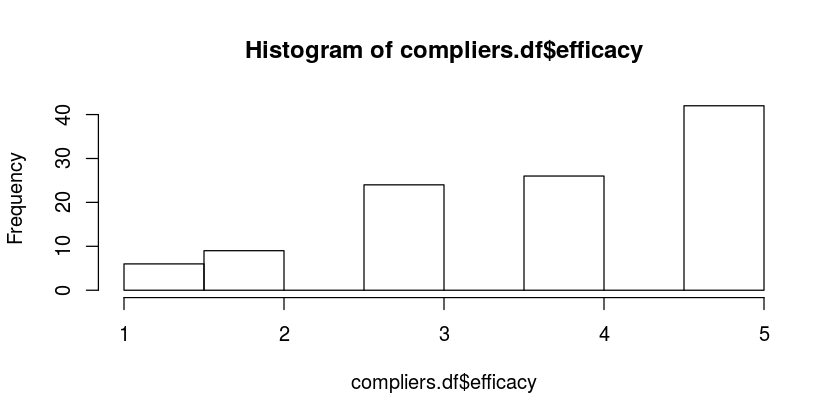

In [18]:
summary(compliers.df$efficacy)
hist(compliers.df$efficacy)

In [19]:
summary(factor(compliers.df$manipulation.check))
CrossTable(compliers.df$efficacy, compliers.df$manipulation.check, prop.chisq = FALSE, prop.t = FALSE, prop.c=FALSE)

summary(lm(efficacy ~ manipulation.check, data=compliers.df))

FALSE  TRUE 
   70    37


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|-------------------------|

 
Total Observations in Table:  107 

 
                      | compliers.df$manipulation.check 
compliers.df$efficacy |     FALSE |      TRUE | Row Total | 
----------------------|-----------|-----------|-----------|
                    1 |         6 |         0 |         6 | 
                      |     1.000 |     0.000 |     0.056 | 
----------------------|-----------|-----------|-----------|
                    2 |         4 |         5 |         9 | 
                      |     0.444 |     0.556 |     0.084 | 
----------------------|-----------|-----------|-----------|
                    3 |        16 |         8 |        24 | 
                      |     0.667 |     0.333 |     0.224 | 
----------------------|-----------|-----------|-----------|
                    4 |        16 |        10 |        26 | 
                      |     0.615 |     0.


Call:
lm(formula = efficacy ~ manipulation.check, data = compliers.df)

Residuals:
   Min     1Q Median     3Q    Max 
  -2.8   -0.8    0.2    1.2    1.2 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)              3.8000     0.1442   26.36   <2e-16 ***
manipulation.checkTRUE   0.0919     0.2452    0.37     0.71    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.21 on 105 degrees of freedom
Multiple R-squared:  0.00134,	Adjusted R-squared:  -0.00817 
F-statistic: 0.14 on 1 and 105 DF,  p-value: 0.709


### Reported Community Friendliness (NOT IN DATA)
Thinking about the French Wikipedia community, how much would you say the community
overall is:  [Likert scale 1 (\Not at all") to 5 (\Extremely")]
* Friendly

In [20]:
summary(compliers.df$friendliness)
hist(compliers.df$friendliness)

Length  Class   Mode 
     0   NULL   NULL 

ERROR: Error in hist.default(compliers.df$friendliness): 'x' must be numeric


### Reported Community Warmth (maybe substituted for friendliness?)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    3.00    4.00    3.54    5.00    5.00 


Call:
lm(formula = community.warmth ~ manipulation.check, data = compliers.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0541 -1.0541 -0.0541  0.9459  1.7286 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)               3.271      0.137   23.90   <2e-16 ***
manipulation.checkTRUE    0.783      0.233    3.36   0.0011 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.15 on 105 degrees of freedom
Multiple R-squared:  0.0972,	Adjusted R-squared:  0.0886 
F-statistic: 11.3 on 1 and 105 DF,  p-value: 0.00108


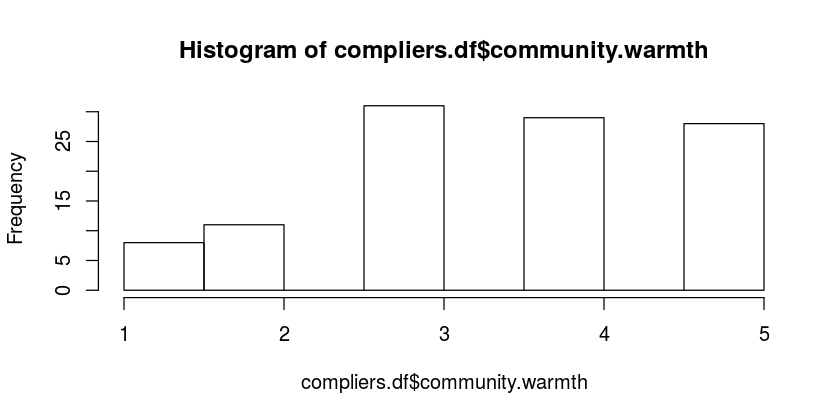

In [21]:
summary(compliers.df$community.warmth)
hist(compliers.df$community.warmth)

summary(lm(community.warmth ~ manipulation.check, data=compliers.df))

# Correlation Plot

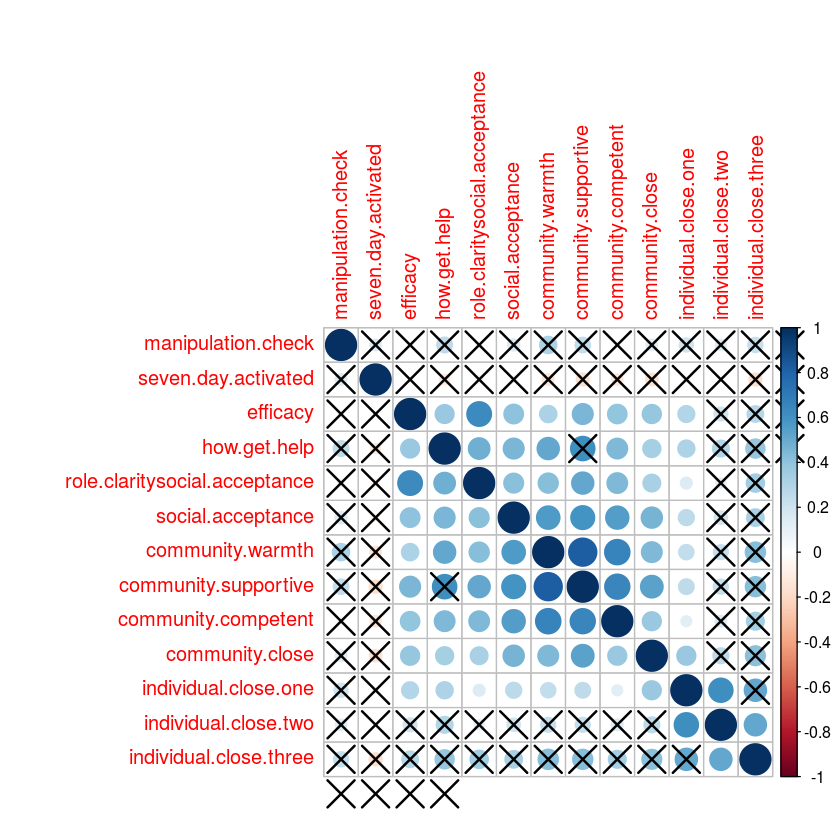

In [22]:
options(repr.plot.width=7, repr.plot.height=7)

cor.df <- cor.mtest(compliers.df[c('manipulation.check',
                                    'seven.day.activated',
                                    'gen.experience', 
                                    'efficacy',
                                    'how.get.help',
                                    'role.claritysocial.acceptance',
                                    'social.acceptance',
                                    'community.warmth',
                                    'community.supportive',
                                    'community.competent',
                                    'community.close',
                                    'individual.close.one',
                                    'individual.close.two',
                                    'individual.close.three')], conf.level=0.95, method="pearson")


corrplot(cor(compliers.df[c('manipulation.check',
                            'seven.day.activated',
                            'efficacy',
                            'how.get.help',
                            'role.claritysocial.acceptance',
                            'social.acceptance',
                            'community.warmth',
                            'community.supportive',
                            'community.competent',
                            'community.close',
                            'individual.close.one',
                            'individual.close.two',
                            'individual.close.three')],
            method="pearson"), 
         sig.level = 0.001, p.mat = cor.df$p)

# Power Analysis

### Utility Methods

In [41]:
# Return the difference in mu associated with an incidence rate ratio
# from a negative binomial model. This difference can then be used to
# simulate a negative binomial distribution for the effect of a given irr
#                                                                       
#` @param mu The baseline mu in question                               
#` @param irr The incidence rate ratio in question
mu.diff.from.mu.irr <- function(mu, irr){
    mu*(irr-1)
}

# Return the total sum of betas for a
# logistic regression, given a probability
#
#` @param p the probability in question
betas.logit.from.prob <- function(p){
    log(p/(1-p))
}


# Return the total sum of betas for a
# logistic regression, given a probability
#
#` @param Y list of observed Ys
betas.logit.from.mean <- function(Y){
    p = mean(Y)
    log(p/(1-p))
}

# Return the minimum power reported in a diagnosis
# 
#` @param diagnosis
min.diagnosis.power <- function(diagnosis){
    min(diagnosis$diagnosands_df['power'])
}

# Iterate linearly for a certain level of statistical power
# within the constraints of a configuration file
# at a certain sample size increment. Useful for
# illustrating ideas, or for comparing estimators with
# very different statistical power, where the binary search
# will optimize for the worst estimator but not show useful
# indormation about more efficient estimators
#
#` @param config.df The configuration file in question
#` @diagnosis.method The method that conducts a single DeclareDesign diagnosis and returns the diagnosis
#` @iteration.interval when iterating, use this interval between sample sizes

iterate.for.power <- function(config.df, diagnosis.method = diagnose.experiment, 
                             iteration.interval){  
    max.sample.size = config.df$n.max
    min.sample.size = config.df$n.min
    current.sample.size = min.sample.size
    
    iteration.count = ceiling((max.sample.size - min.sample.size) / iteration.interval)

    ## Initialize first iteration
    print(paste("min:", min.sample.size, "max:", max.sample.size, "current:", current.sample.size))
    flush.console()

    ptm = proc.time()
    ddf <- diagnosis.method(current.sample.size, config.df)
    ddf$diagnosands$n <- current.sample.size
    diagnoses.df = ddf$diagnosands
    current.power <- min.diagnosis.power(ddf)
    time.elapsed <- proc.time() -  ptm
    print(paste("     seconds:", as.integer(time.elapsed['elapsed'])))
    
    for(i in seq(1, iteration.count)){
        current.sample.size = current.sample.size + iteration.interval
        print(paste("min:", min.sample.size, "max:", max.sample.size, "current:", current.sample.size))
        flush.console()
    
        ptm = proc.time()
        ## conduct simulations
        ddf <- diagnosis.method(current.sample.size, config.df)
        ddf$diagnosands$n <- current.sample.size
        ## append simulation results to dataframe
        diagnoses.df <- rbind(diagnoses.df, ddf$diagnosands)
        time.elapsed <- proc.time() -  ptm
        print(paste("     seconds:", as.integer(time.elapsed['elapsed'])))
    }
    diagnoses.df
}

# Create a plot of a power search or iteration output
# And save to a file
# Especially useful in cases with multiple DVs or models
#
#` @param diagnoses Dataframe of diagnosis info
#` @param config.df the power analysis config dataframe

plot.power.results <- function(diagnoses, config.df){
    for(estimator_label in unique(diagnoses$estimator_label)){
        estimator.diagnoses <- diagnoses[diagnoses$estimator_label==estimator_label,]
        estimator_min_sample = min(estimator.diagnoses$n[estimator.diagnoses$power>0.8])
        p <- ggplot(data=estimator.diagnoses, aes(n, power)) +
                geom_point(color="coral") +
                xlab("sample size") +
                ylim(0,1) +
                geom_hline(aes(yintercept=0.8), linetype="dashed") +
                theme_light() +
                ggtitle(paste(config.df$pa.label, ": statistical Power for Estimator ", estimator_label, "\n",
                              "Minimum sample: ", estimator_min_sample, sep="")) #+
                #ggsave(paste("figures/power.analysis.", make.names(estimator_label), ".", config.df$pa.label, ".png", sep=""))
        print(p)
    }
}


### Configuration

In [44]:
survey.participation.rate = nrow(pilot.df[pilot.df$survey.compliance,]) / nrow(pilot.df)

pa.config <- data.frame(
    n.max    = as.integer(50000*survey.participation.rate), # max number of observations
    n.min    = as.integer(20000*survey.participation.rate), # min number of observations

    ### EFFICACY
    survey.efficacy.treat.current      = mean(compliers.df$efficacy),
    survey.efficacy.sd                 = sd(compliers.df$efficacy),
    ## 0.5 decrease in efficacy from receiving welcome message
    survey.efficacy.control            = mean(compliers.df$efficacy) - 0.5,
    ## 0.35 increase in efficacy from receiving personal invitation welcome message
    survey.efficacy.treat.invitation   = mean(compliers.df$efficacy) + 0.4,
    
    ## FRIENDLINESS
    survey.friendly.treat.current      = mean(compliers.df$community.warmth),
    survey.friendly.sd                 = sd(compliers.df$community.warmth),
    ## 0.5 decrease in efficacy from receiving welcome message
    survey.friendly.control            = mean(compliers.df$community.warmth) - 0.5,
    ## 0.35 increase in efficacy from receiving personal invitation welcome message
    survey.friendly.treat.invitation   = mean(compliers.df$community.warmth) + 0.4
)

In [48]:
# Diagnose Experiment: take in a reference dataframe and configuration 
# and diagnose the design
#
#` @param sample.size: The sample size
#` @param pa.config: the configuration dataframe to use
#` @sims.count: the number of simulations to conduct and aggregate
#` @bootstrap.sims.count: the number of bootstraps to perform for estimating 
#                         confidence intervals for the generated diagnoses

diagnose.experiment <- function(sample.size, pa.config, 
                                sims.count=500, bootstrap.sims.count=500){
design <- 
    declare_population(
        N = sample.size
    ) +
    declare_potential_outcomes(
        E_Z_0 = draw_ordered(x=rnorm(sample.size,
                           pa.config$survey.efficacy.control,
                           pa.config$survey.efficacy.sd),
                           breaks = c(0.5, 1.5, 2.5, 3.5)),
        E_Z_1 = draw_ordered(x=rnorm(sample.size,
                           pa.config$survey.efficacy.treat.current,
                           pa.config$survey.efficacy.sd),
                           breaks = c(0.5, 1.5, 2.5, 3.5)),
        E_Z_2 = draw_ordered(x=rnorm(sample.size,
                           pa.config$survey.efficacy.treat.invitation,
                           pa.config$survey.efficacy.sd),
                           breaks = c(0.5, 1.5, 2.5, 3.5)),
        F_Z_0 = draw_ordered(x=rnorm(sample.size,
                           pa.config$survey.friendly.control,
                           pa.config$survey.friendly.sd),
                           breaks = c(0.5, 1.5, 2.5, 3.5)),
        F_Z_1 = draw_ordered(x=rnorm(sample.size,
                           pa.config$survey.friendly.treat.current,
                           pa.config$survey.friendly.sd),
                           breaks = c(0.5, 1.5, 2.5, 3.5)),
        F_Z_2 = draw_ordered(x=rnorm(sample.size,
                           pa.config$survey.friendly.treat.invitation,
                           pa.config$survey.friendly.sd),
                           breaks = c(0.5, 1.5, 2.5, 3.5))    
    ) +
    
    ## three arms
    declare_assignment(conditions=0:2) +
    declare_estimand(
        ATE_E_1_0 = pa.config$survey.efficacy.treat.current - pa.config$survey.efficacy.control,
        ATE_E_2_1 = pa.config$survey.efficacy.treat.invitation - pa.config$survey.efficacy.treat.current,
        ATE_F_1_0 = pa.config$survey.friendly.treat.current - pa.config$survey.friendly.control,
        ATE_F_2_1 = pa.config$survey.friendly.treat.invitation - pa.config$survey.friendly.treat.current
    ) +
    declare_reveal(
        outcome_variables    = c("E", "F"),
        assignment_variables = c("Z")
    ) +
    declare_estimator(
        formula  = E ~ Z,
        model    = difference_in_means,
        estimand = "ATE_E_1_0",
        subset   = Z!=2,
        label    = "E-ate_E_1_0"
    ) + 
    declare_estimator(
        formula  = E ~ Z-1,
        model    = difference_in_means,
        estimand = "ATE_E_2_1",
        subset   = Z!=0,
        label    = "E-ate_E_2_1"
    ) +
    declare_estimator(
        formula  = F ~ Z,
        model    = difference_in_means,
        estimand = "ATE_F_1_0",
        subset   = Z!=2,
        label    = "F-ate_F_1_0"
    ) + 
    declare_estimator(
        formula  = F ~ Z-1,
        model    = difference_in_means,
        estimand = "ATE_F_2_1",
        subset   = Z!=0,
        label    = "F-ate_F_2_1"
    )
    
    
    diagnosis <- diagnose_design(design, sims = sims.count, bootstrap_sims = bootstrap.sims.count)
}

# Conduct Power Analysis (Not Adjusting for Multiple Comparisons)

In [49]:
newcomer.pa.results <- iterate.for.power(pa.config, 
                                         diagnose.experiment, 50) 

[1] "min: 269 max: 673 current: 269"
[1] "     seconds: 15"
[1] "min: 269 max: 673 current: 319"
[1] "     seconds: 15"
[1] "min: 269 max: 673 current: 369"
[1] "     seconds: 15"
[1] "min: 269 max: 673 current: 419"
[1] "     seconds: 15"
[1] "min: 269 max: 673 current: 469"
[1] "     seconds: 15"
[1] "min: 269 max: 673 current: 519"
[1] "     seconds: 16"
[1] "min: 269 max: 673 current: 569"
[1] "     seconds: 16"
[1] "min: 269 max: 673 current: 619"
[1] "     seconds: 16"
[1] "min: 269 max: 673 current: 669"
[1] "     seconds: 16"
[1] "min: 269 max: 673 current: 719"
[1] "     seconds: 16"


In [53]:
#newcomer.pa.results

Warning message in min(estimator.diagnoses$n[estimator.diagnoses$power > 0.8]):
“no non-missing arguments to min; returning Inf”

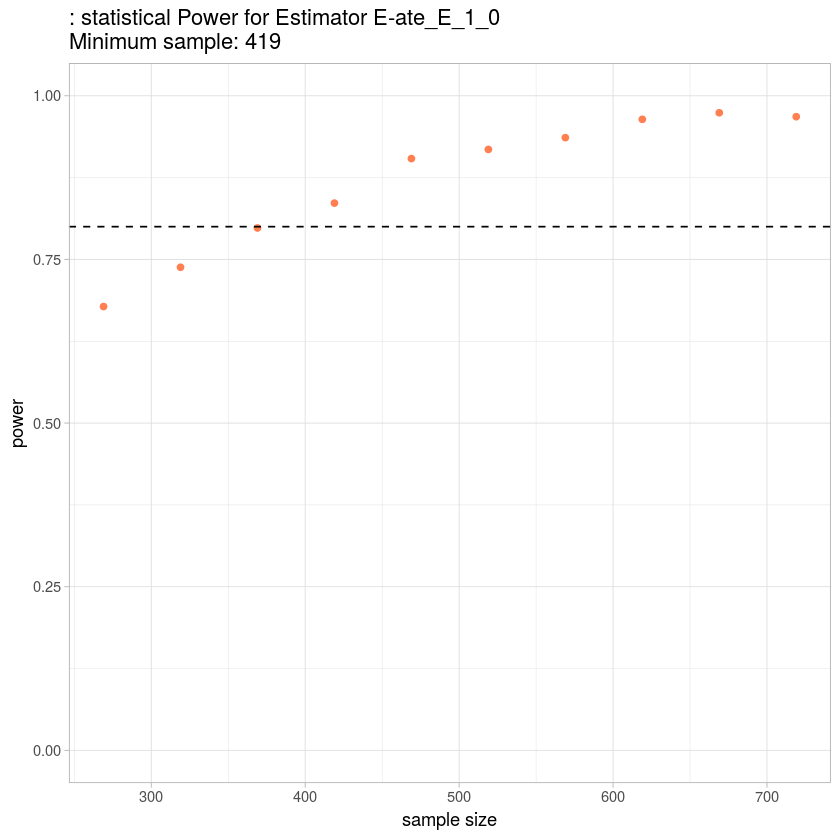

Warning message in min(estimator.diagnoses$n[estimator.diagnoses$power > 0.8]):
“no non-missing arguments to min; returning Inf”

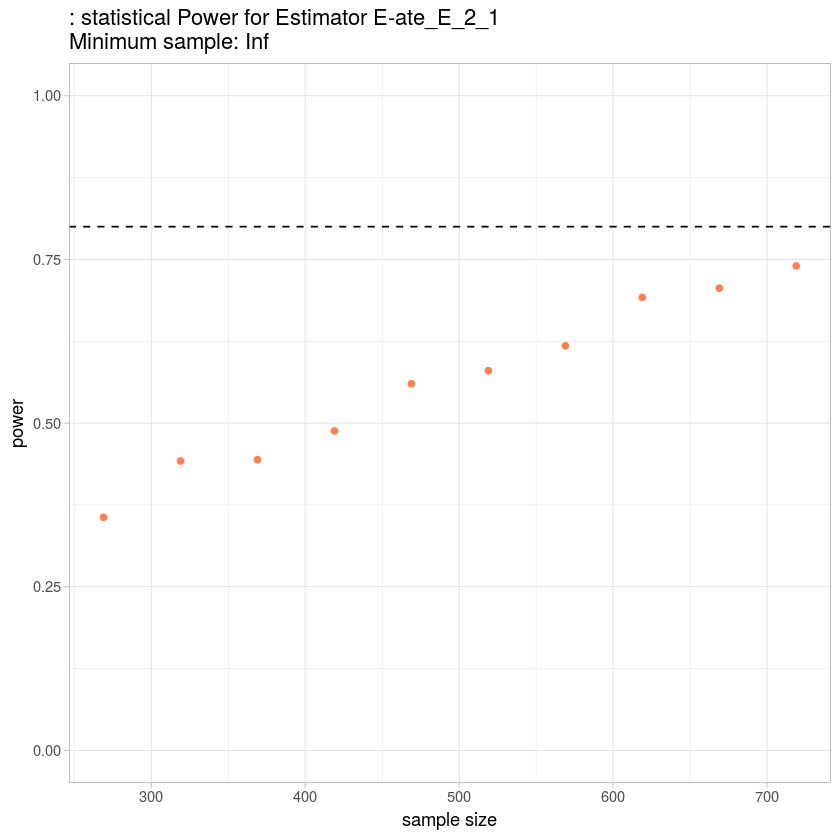

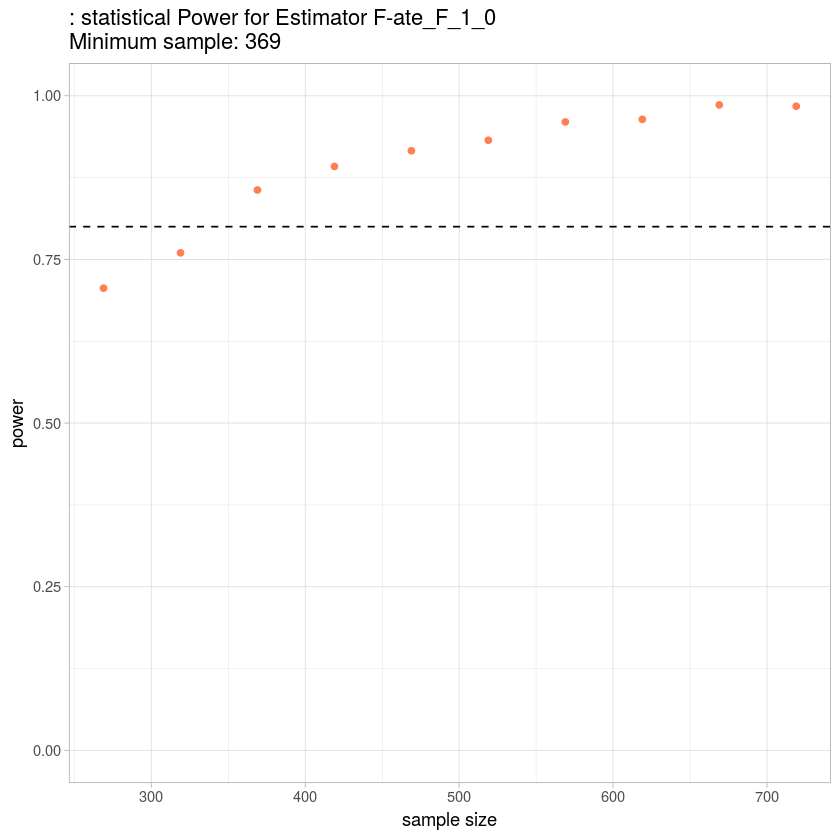

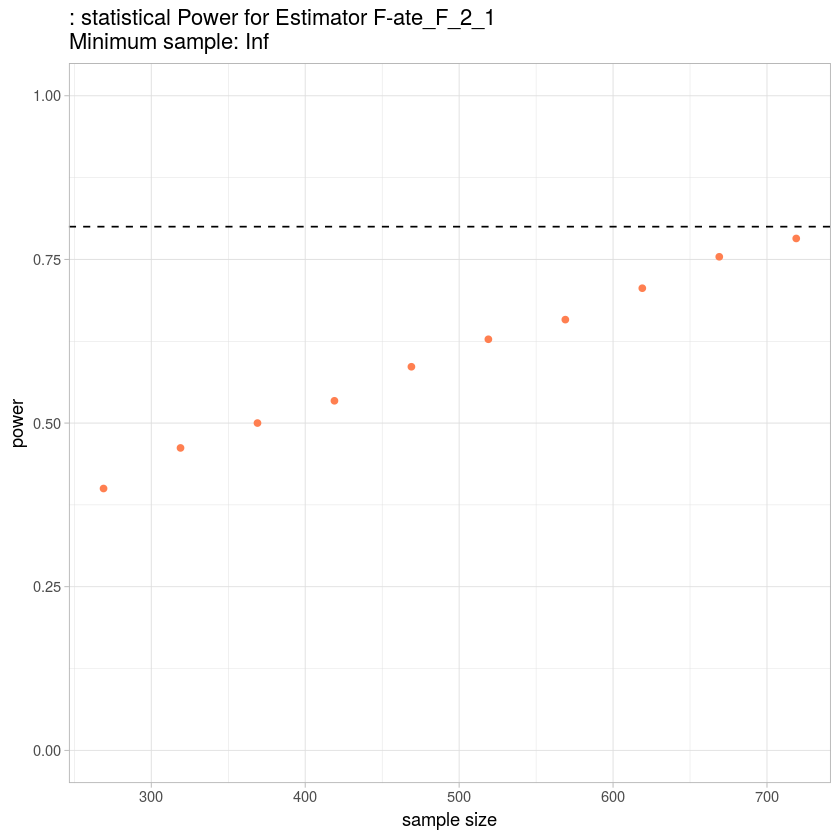

In [54]:
plot.power.results(newcomer.pa.results, pa.config)